# Table Tools
## Part 1

In this notebook we will:

- Briefly review what we learned about arrays
- Learn how to build a table from scratch (using arrays)
- Learn about the **with_column** and **with_columns** functions
- Learn how to import a table from a .csv file
- Learn some of the functions for subsetting tables (such as **select**, **where**, and **take**)
- Learn the **relabeled** function

We'll also see another example of a line plot.  


In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Review of Arrays

In [2]:
heights = make_array(67, 60, 71, 63, 65)
heights

array([67, 60, 71, 63, 65], dtype=int64)

In [3]:
heights / 12

array([5.58333333, 5.        , 5.91666667, 5.25      , 5.41666667])

In [4]:
sum(heights)

326

In [5]:
np.average(heights)

65.2

In [6]:
strings_array = make_array('ok', 'ya', 'hm')
strings_array

array(['ok', 'ya', 'hm'], dtype='<U2')

In [7]:
heights.item(4)

65

In [8]:
heights[4]

65

In [9]:
strings_array.item(0)

'ok'

In [10]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [11]:
np.arange(15, 7, -1)

array([15, 14, 13, 12, 11, 10,  9,  8])

In [12]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [13]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [14]:
a = np.arange(8)

In [15]:
a

array([0, 1, 2, 3, 4, 5, 6, 7])

In [16]:
a.item(7)

7

## Creating a Table from Scratch ##

In [17]:
streets = make_array('Chestatee', 'Park', 'Meaders', 'Grove')
streets

array(['Chestatee', 'Park', 'Meaders', 'Grove'], dtype='<U9')

In [18]:
Table()

In [19]:
southside = Table().with_column('Streets', streets)
southside

Streets
Chestatee
Park
Meaders
Grove


In [20]:
southside.with_column('Blocks from campus', np.arange(4))

Streets,Blocks from campus
Chestatee,0
Park,1
Meaders,2
Grove,3


In [21]:
southside

Streets
Chestatee
Park
Meaders
Grove


In [22]:
southside = southside.with_column('Blocks from campus', np.arange(4))
southside

Streets,Blocks from campus
Chestatee,0
Park,1
Meaders,2
Grove,3


In [23]:
southside.labels

('Streets', 'Blocks from campus')

In [24]:
southside.num_columns

2

In [25]:
southside.num_rows

4

## Reading a Table from a File  ##

In [26]:
du_bois = Table.read_table('du_bois.csv')
du_bois

CLASS,ACTUAL AVERAGE,RENT,FOOD,CLOTHES,TAXES,OTHER,STATUS
100-200,139.1,0.19,0.43,0.28,0.001,0.099,POOR
200-300,249.45,0.22,0.47,0.23,0.04,0.04,POOR
300-400,335.66,0.23,0.43,0.18,0.045,0.115,FAIR
400-500,433.82,0.18,0.37,0.15,0.055,0.245,FAIR
500-750,547,0.13,0.31,0.17,0.05,0.34,COMFORTABLE
750-1000,880,0,0.37,0.19,0.08,0.36,COMFORTABLE
1000 and over,1125,0,0.29,0.16,0.045,0.505,WELL-TO-DO


Which group ("CLASS") spent the highest percentage on rent?

In [27]:
du_bois.sort("RENT", descending=True)

CLASS,ACTUAL AVERAGE,RENT,FOOD,CLOTHES,TAXES,OTHER,STATUS
300-400,335.66,0.23,0.43,0.18,0.045,0.115,FAIR
200-300,249.45,0.22,0.47,0.23,0.04,0.04,POOR
100-200,139.1,0.19,0.43,0.28,0.001,0.099,POOR
400-500,433.82,0.18,0.37,0.15,0.055,0.245,FAIR
500-750,547,0.13,0.31,0.17,0.05,0.34,COMFORTABLE
750-1000,880,0,0.37,0.19,0.08,0.36,COMFORTABLE
1000 and over,1125,0,0.29,0.16,0.045,0.505,WELL-TO-DO


In [28]:
du_bois.select('STATUS')

STATUS
POOR
POOR
FAIR
FAIR
COMFORTABLE
COMFORTABLE
WELL-TO-DO


In [29]:
du_bois.column('STATUS')

array(['POOR', 'POOR', 'FAIR', 'FAIR', 'COMFORTABLE', 'COMFORTABLE',
       'WELL-TO-DO'], dtype='<U11')

In [30]:
du_bois.select('STATUS')

STATUS
POOR
POOR
FAIR
FAIR
COMFORTABLE
COMFORTABLE
WELL-TO-DO


In [31]:
du_bois.column('STATUS')

array(['POOR', 'POOR', 'FAIR', 'FAIR', 'COMFORTABLE', 'COMFORTABLE',
       'WELL-TO-DO'], dtype='<U11')

In [32]:
du_bois.column('ACTUAL AVERAGE')

array([ 139.1 ,  249.45,  335.66,  433.82,  547.  ,  880.  , 1125.  ])

In [33]:
du_bois.column('FOOD')

array([0.43, 0.47, 0.43, 0.37, 0.31, 0.37, 0.29])

In [34]:
du_bois.column('ACTUAL AVERAGE') * du_bois.column('FOOD')

array([ 59.813 , 117.2415, 144.3338, 160.5134, 169.57  , 325.6   ,
       326.25  ])

In [35]:
food_dollars = du_bois.column('ACTUAL AVERAGE') * du_bois.column('FOOD')
du_bois = du_bois.with_column(
    'Food $',
    food_dollars
)
du_bois

CLASS,ACTUAL AVERAGE,RENT,FOOD,CLOTHES,TAXES,OTHER,STATUS,Food $
100-200,139.1,0.19,0.43,0.28,0.001,0.099,POOR,59.813
200-300,249.45,0.22,0.47,0.23,0.04,0.04,POOR,117.241
300-400,335.66,0.23,0.43,0.18,0.045,0.115,FAIR,144.334
400-500,433.82,0.18,0.37,0.15,0.055,0.245,FAIR,160.513
500-750,547,0.13,0.31,0.17,0.05,0.34,COMFORTABLE,169.57
750-1000,880,0,0.37,0.19,0.08,0.36,COMFORTABLE,325.6
1000 and over,1125,0,0.29,0.16,0.045,0.505,WELL-TO-DO,326.25


In [36]:
du_bois.set_format('FOOD', PercentFormatter)

CLASS,ACTUAL AVERAGE,RENT,FOOD,CLOTHES,TAXES,OTHER,STATUS,Food $
100-200,139.1,0.19,43.00%,0.28,0.001,0.099,POOR,59.813
200-300,249.45,0.22,47.00%,0.23,0.04,0.04,POOR,117.241
300-400,335.66,0.23,43.00%,0.18,0.045,0.115,FAIR,144.334
400-500,433.82,0.18,37.00%,0.15,0.055,0.245,FAIR,160.513
500-750,547,0.13,31.00%,0.17,0.05,0.34,COMFORTABLE,169.57
750-1000,880,0,37.00%,0.19,0.08,0.36,COMFORTABLE,325.6
1000 and over,1125,0,29.00%,0.16,0.045,0.505,WELL-TO-DO,326.25


In [37]:
du_bois.select('CLASS', 'ACTUAL AVERAGE', 'FOOD', 'Food $')

CLASS,ACTUAL AVERAGE,FOOD,Food $
100-200,139.1,43.00%,59.813
200-300,249.45,47.00%,117.241
300-400,335.66,43.00%,144.334
400-500,433.82,37.00%,160.513
500-750,547,31.00%,169.57
750-1000,880,37.00%,325.6
1000 and over,1125,29.00%,326.25


In [38]:
du_bois.column('FOOD')

array([0.43, 0.47, 0.43, 0.37, 0.31, 0.37, 0.29])

## Selecting data in a column ##

In [39]:
movies = Table.read_table('movies_by_year_with_ticket_price.csv')
movies.show()

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
2019,9.16,11237.9,788,Avengers: Endgame
2018,9.11,11611.3,878,Black Panther
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi
2016,8.65,11373.7,737,Rogue One: A Star Wars Story
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens
2014,8.17,10436.8,708,American Sniper
2013,8.13,10955.9,689,The Hunger Games: Catching Fire
2012,7.96,10959.6,669,The Avengers
2011,7.93,10114.1,601,Harry Potter and the Deathly Hallows: Part 2
2010,7.89,10212.7,538,Toy Story 3


In [40]:
gross_in_dollars = movies.column('Total Gross') * 1e6
tix_sold = gross_in_dollars / movies.column('Average Ticket Price')

In [41]:
movies = movies.with_column('Tickets sold', tix_sold)

In [42]:
movies.show(4)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2019,9.16,11237.9,788,Avengers: Endgame,1.22684e+09
2018,9.11,11611.3,878,Black Panther,1.27457e+09
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi,1.24029e+09
2016,8.65,11373.7,737,Rogue One: A Star Wars Story,1.31488e+09


In [43]:
movies.set_format('Tickets sold', NumberFormatter)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2019,9.16,11237.9,788,Avengers: Endgame,"1,226,844,978.17"
2018,9.11,11611.3,878,Black Panther,"1,274,566,410.54"
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi,"1,240,289,855.07"
2016,8.65,11373.7,737,Rogue One: A Star Wars Story,"1,314,878,612.72"
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens,"1,316,583,629.89"
2014,8.17,10436.8,708,American Sniper,"1,277,454,100.37"
2013,8.13,10955.9,689,The Hunger Games: Catching Fire,"1,347,589,175.89"
2012,7.96,10959.6,669,The Avengers,"1,376,834,170.85"
2011,7.93,10114.1,601,Harry Potter and the Deathly Hallows: Part 2,"1,275,422,446.41"
2010,7.89,10212.7,538,Toy Story 3,"1,294,385,297.85"


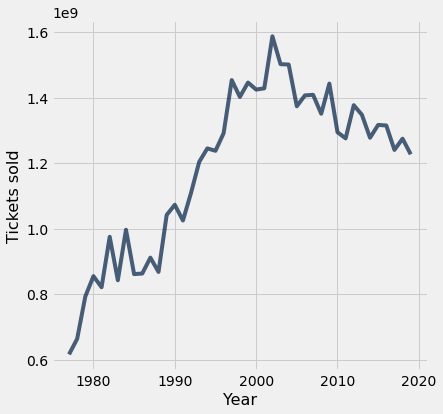

In [44]:
movies.plot('Year', 'Tickets sold')

In [45]:
movies.where('Year', are.between(2000, 2005))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2004,6.21,9321.7,551,Shrek 2,"1,501,078,904.99"
2003,6.03,9057.5,506,The Lord of the Rings: The Return of the King,"1,502,072,968.49"
2002,5.8,9206.4,480,Spider-Man,"1,587,310,344.83"
2001,5.65,8070,356,Harry Potter and the Sorcerer's Stone,"1,428,318,584.07"
2000,5.39,7678.3,371,How the Grinch Stole Christmas,"1,424,545,454.55"


In [46]:
movies.where('Year', 2002)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2002,5.8,9206.4,480,Spider-Man,"1,587,310,344.83"


In [47]:
movies.where('Year', are.equal_to(2002))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2002,5.8,9206.4,480,Spider-Man,"1,587,310,344.83"


In [48]:
movies.where('#1 Movie', are.containing('Harry Potter'))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2011,7.93,10114.1,601,Harry Potter and the Deathly Hallows: Part 2,"1,275,422,446.41"
2001,5.65,8070,356,Harry Potter and the Sorcerer's Stone,"1,428,318,584.07"


In [49]:
movies.where('#1 Movie', are.containing('Star Wars')).where('#1 Movie', are.not_containing('Menace'))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi,"1,240,289,855.07"
2016,8.65,11373.7,737,Rogue One: A Star Wars Story,"1,314,878,612.72"
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens,"1,316,583,629.89"
2005,6.41,8804.7,547,Star Wars: Episode III - Revenge of the Sith,"1,373,588,143.53"
1983,3.15,2652.9,158,Star Wars: Episode VI - Return of the Jedi,"842,190,476.19"
1980,2.69,2299,115,Star Wars: Episode V - The Empire Strikes Back,"854,646,840.15"
1977,2.23,1373.1,35,Star Wars: Episode IV - A New Hope,"615,739,910.31"


In [50]:
movies.take(np.arange(2 ,5))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi,"1,240,289,855.07"
2016,8.65,11373.7,737,Rogue One: A Star Wars Story,"1,314,878,612.72"
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens,"1,316,583,629.89"


In [51]:
np.arange(2, 5)

array([2, 3, 4])

In [52]:
movies.show(5)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2019,9.16,11237.9,788,Avengers: Endgame,"1,226,844,978.17"
2018,9.11,11611.3,878,Black Panther,"1,274,566,410.54"
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi,"1,240,289,855.07"
2016,8.65,11373.7,737,Rogue One: A Star Wars Story,"1,314,878,612.72"
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens,"1,316,583,629.89"


## Census ##

In [53]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [54]:
partial = full.select('SEX', 'AGE', 'CENSUS2010POP', 'POPESTIMATE2014')
partial.show(4)

SEX,AGE,CENSUS2010POP,POPESTIMATE2014
0,0,3944153,3948350
0,1,3978070,3962123
0,2,4096929,3957772
0,3,4119040,4005190


In [55]:
simple = partial.relabeled(2, '2010').relabeled(3, '2014')
simple.show(4)

SEX,AGE,2010,2014
0,0,3944153,3948350
0,1,3978070,3962123
0,2,4096929,3957772
0,3,4119040,4005190


In [56]:
simple.sort('AGE')

SEX,AGE,2010,2014
0,0,3944153,3948350
1,0,2014276,2017857
2,0,1929877,1930493
0,1,3978070,3962123
1,1,2030853,2023253
2,1,1947217,1938870
0,2,4096929,3957772
1,2,2092198,2022502
2,2,2004731,1935270
0,3,4119040,4005190


In [57]:
simple.sort('AGE', descending=True)

SEX,AGE,2010,2014
0,999,308745538,318857056
1,999,151781326,156936487
2,999,156964212,161920569
0,100,53364,72197
1,100,9162,13729
2,100,44202,58468
0,99,32266,41828
1,99,6073,9037
2,99,26193,32791
0,98,45900,60185


## Line Plots ##

In [58]:
no_999 = simple.where('AGE', are.below(999))
everyone = no_999.where('SEX', 0).drop('SEX')

In [59]:
everyone

AGE,2010,2014
0,3944153,3948350
1,3978070,3962123
2,4096929,3957772
3,4119040,4005190
4,4063170,4003448
5,4056858,4004858
6,4066381,4134352
7,4030579,4154000
8,4046486,4119524
9,4148353,4106832


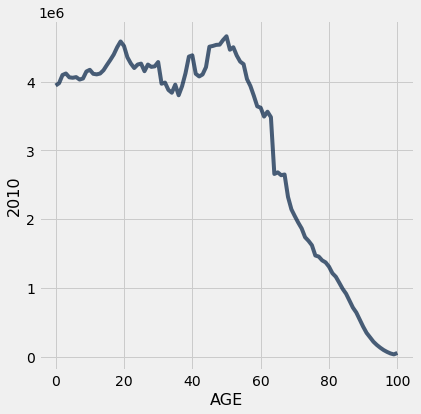

In [60]:
everyone.plot('AGE', '2010')

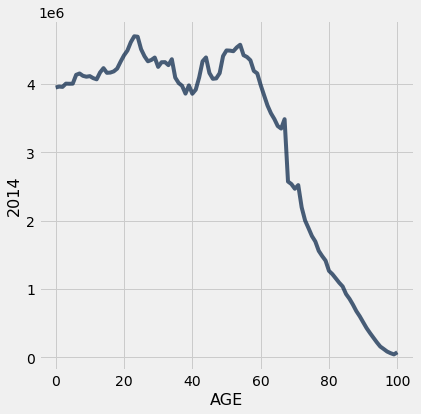

In [61]:
everyone.plot('AGE','2014')

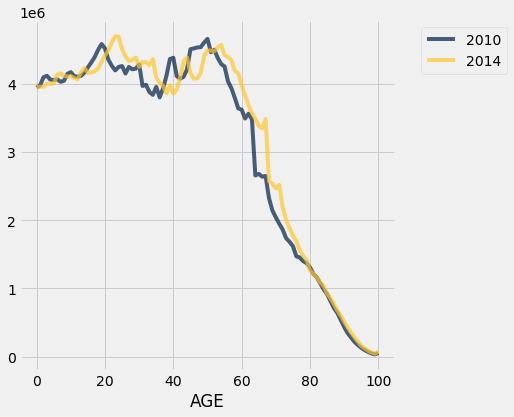

In [62]:
everyone.plot("AGE")